# Predicting heart disease using machine learning

## Introduction
In this project, we will use Python-based machine learning and data science tools to build a model capable of predicting whether a person is likely 
to develop heart disease based on their medical attributes.

## Objective
The objective of this project is to apply machine learning algorithms to analyze medical data and develop a predictive model that can help determine the 
likelihood of heart disease. We will use a set of medical attributes such as age, blood pressure, cholesterol levels, and other relevant variables to 
train the model.

## Project Steps
1. **Data Import and Loading:** We will start by loading the medical dataset containing the necessary attributes for prediction.
2. **Data Exploration:** The data will be explored and analyzed to understand the distributions and correlations between different attributes.
3. **Data Preparation:** The data will be cleaned and split into training and testing sets.
4. **Model Building:** Machine learning algorithms such as Logistic Regression or Random Forest will be used to build the predictive model.
5. **Model Evaluation:** The model's performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score.
6. **Model Testing:** Finally, the model will be tested on a dataset that was not used during training to verify its performance.

## Tools Used
- **Python**: The primary programming language used for implementing this project.
- **Libraries**: Popular data science libraries such as Pandas, NumPy, and Scikit-learn will be used to build the model and analyze the data.

## Benchmark for Success

In this project, we have set a benchmark to determine the success of our Proof of Concept (PoC). The model must achieve an accuracy of at least **95%** 
on the test dataset to be considered successful. 

Achieving this benchmark indicates that the model is reliable and performs well in predicting heart disease based on the provided medical attributes. 
If the model's accuracy falls below this threshold, further improvements and optimizations will be necessary to enhance its performance.


## Data Dictionary

Below is a detailed description of each feature in the dataset. This information is essential for understanding the attributes used to predict heart disease.

| **Feature**  | **Description** |
|--------------|-----------------|
| `age`        | Age in years. |
| `sex`        | Sex of the individual (1 = male, 0 = female). |
| `cp`         | Chest pain type: <br>0: Typical angina (chest pain related to decreased blood supply to the heart)<br>1: Atypical angina (chest pain not related to the heart)<br>2: Non-anginal pain (typically esophageal spasms, non-heart related)<br>3: Asymptomatic (chest pain without signs of disease). |
| `trestbps`   | Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically a cause for concern. |
| `chol`       | Serum cholesterol in mg/dl (LDL + HDL + 0.2 * triglycerides). A level above 200 is a cause for concern. |
| `fbs`        | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false). A level '>126' mg/dL signals diabetes. |
| `restecg`    | Resting electrocardiographic results: <br>0: Nothing to note<br>1: ST-T Wave abnormality (can range from mild symptoms to severe problems; signals non-normal heart beat)<br>2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber). |
| `thalach`    | Maximum heart rate achieved. |
| `exang`      | Exercise induced angina (1 = yes, 0 = no). |
| `oldpeak`    | ST depression induced by exercise relative to rest (looks at stress on the heart during exercise; an unhealthy heart will stress more). |
| `slope`      | The slope of the peak exercise ST segment: <br>0: Upsloping (better heart rate with exercise, uncommon)<br>1: Flatsloping (minimal change, typical for a healthy heart)<br>2: Downsloping (signs of an unhealthy heart). |
| `ca`         | Number of major vessels (0-3) colored by fluoroscopy (colored vessel means the doctor can see the blood passing through; the more blood movement, the better—no clots). |
| `thal`       | Thalium stress test result: <br>1,3: Normal<br>6: Fixed defect (used to be a defect, but is okay now)<br>7: Reversible defect (no proper blood movement when exercising). |
| `target`     | Indicates the presence of heart disease (1 = yes, 0 = no). This is the predicted attribute. |




In [3]:
#Importing essential libraries for data manipulation, numerical computations, and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing various machine learning models for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing essential tools from scikit-learn for model evaluation, splitting data, and optimizing models:

from sklearn.model_selection import train_test_split ,cross_val_score ,RandomizedSearchCV , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix ,classification_report
from sklearn.metrics import f1_score , precision_score , recall_score 
from sklearn.metrics import RocCurveDisplay

# Exploring the data (Exploratory data analysis or EDA) 
## **1. Define the Problem**

### Objective:
- Clearly state the problem you need to solve with the data. 
- What is the goal of this analysis? 
- What are you trying to predict or uncover?

## **2. Handle Missing Values**

### Identify Missing Data:
- Examine the dataset for any missing values.
- Identify columns or rows with missing data.

### Strategy to Handle Missing Values:
- Decide on an approach to deal with missing data:
  - Imputation (e.g., mean, median, mode).
  - Removal of rows/columns with too many missing values.
  - Flagging missing values as a separate feature.
## **3. Assess Data Types**

### Check Data Types:
- Review the data types of each variable in the dataset.
- Ensure each variable is of the correct type (e.g., numerical, categorical, dates).

### Convert Data Types if Necessary:
- Identify any incorrect data types.
- Convert data types to the appropriate format:
- Numerical to categorical.
- Dates to a date format.

Note: These steps depend on the specific conditions of the project and may change for other projects

In [4]:
df=pd.read_csv("../first_Ai project/data/heart-disease.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#check the values of two values of target 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

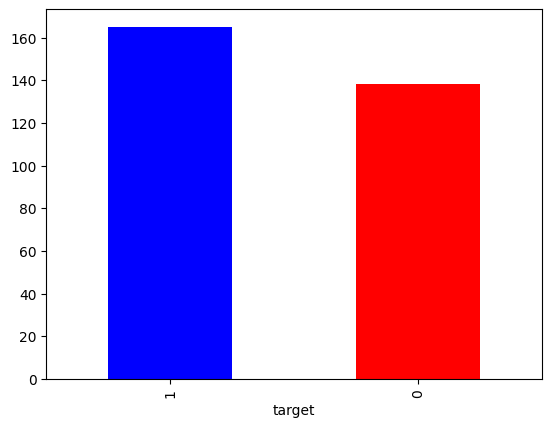

In [8]:
#plot the target data and check it if balnce data or no 
df["target"].value_counts().plot(kind="bar" , color=["blue" , "red"]);

In [9]:
df.shape

(303, 14)

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#check if there is missing value 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# find pattern between feature and target 
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


 As per the above analysis, around 75% of females have heart disease and around 50% of males have heart disease.
Based on the information in the dataset, the average probability of having heart disease, considering both sexes, is approximately 62.5%.

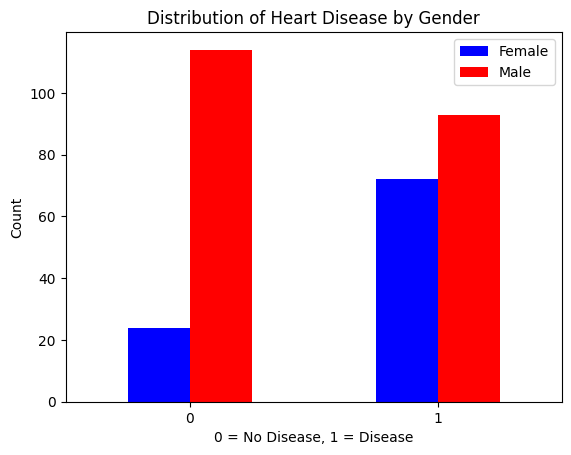

In [16]:
# Visualization of the relationship between sex and target using a bar chart
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["blue", "red"])
plt.title("Distribution of Heart Disease by Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female","Male" ])
plt.xticks(rotation=0)  # Optional: to keep the x-tick labels horizontal
plt.show()  # Ensure the plot is displayed


In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Visualization of Max Heart Rate vs Age

In [18]:

df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

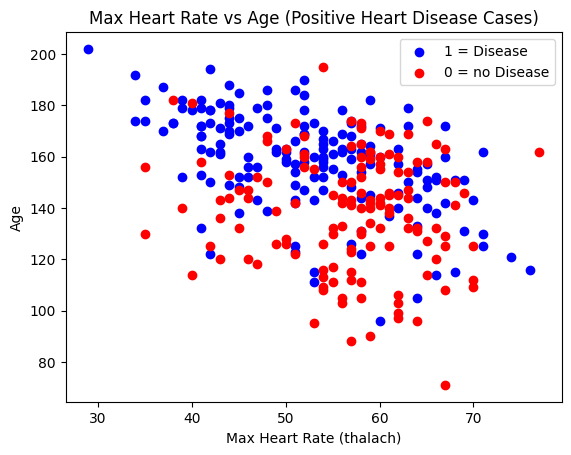

In [19]:
#check the pattern of heart max rate vs age

#postive heart disease 

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="blue" , label="1 = Disease");
#negative heart disese 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="red" , label="0 = no Disease");

plt.title("Max Heart Rate vs Age (Positive Heart Disease Cases)")
plt.xlabel("Max Heart Rate (thalach)")
plt.ylabel("Age")
plt.legend();


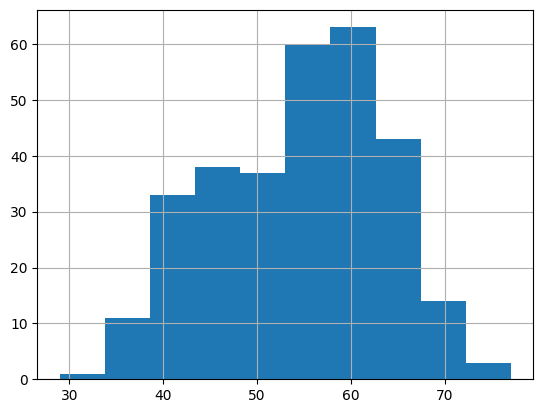

In [20]:
# Check the distribution of the age column using a histogram
df.age.hist();

<Axes: >

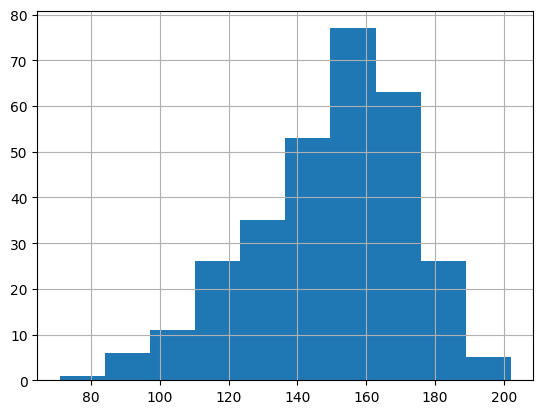

In [21]:
df.thalach.hist()

## cp	Chest pain type:
    0: Typical angina (chest pain related to decreased blood supply to the heart)
    1: Atypical angina (chest pain not related to the heart)
    2: Non-anginal pain (typically esophageal spasms, non-heart related)
    3: Asymptomatic (chest pain without signs of disease).

## Compare cp vs target

In [22]:
pd.crosstab(df.cp ,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


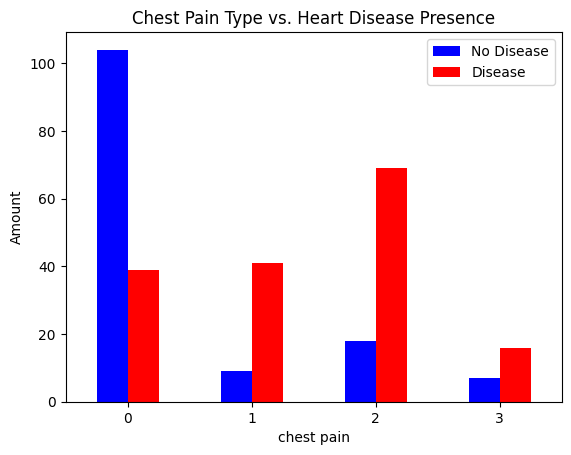

In [23]:
pd.crosstab(df.cp ,df.target).plot(kind="bar" , color=["blue" , "red" ])
plt.title("Chest Pain Type vs. Heart Disease Presence")
plt.xlabel("chest pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Correlation Matrix: Analyzing Relationships Between Variables

In this section, we compute the correlation matrix to explore the relationships between the different variables in our dataset. 
The correlation matrix helps us understand which variables are positively or negatively correlated with each other. 
Positive correlation indicates that as one variable increases, the other tends to increase as well, while negative correlation indicates that 
as one variable increases, the other tends to decrease.


In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## make the correlation matrix more visual and intuitive, we can create a detailed heatmap using Seaborn

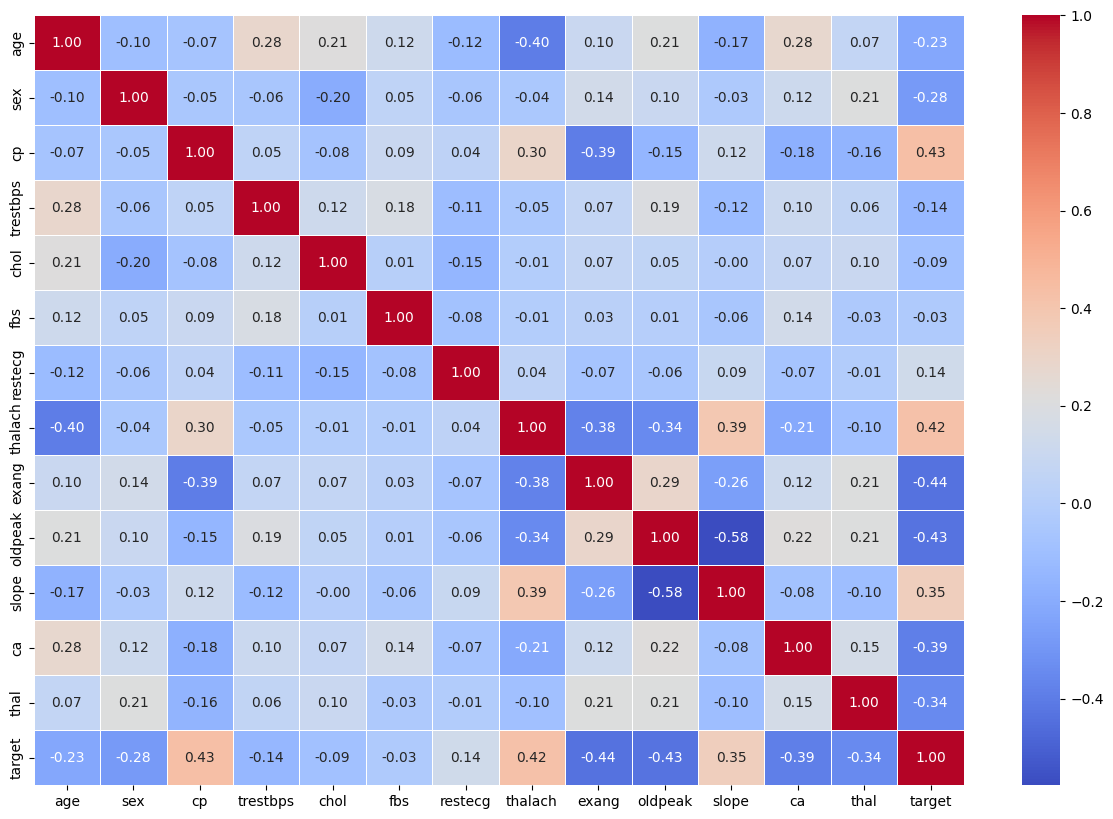

In [25]:
conf_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix , annot=True ,fmt='.2f' ,cmap='coolwarm' ,linewidths=0.5 );


In the above correlation matrix, we'll take an example of the relationship between Chest Pain Type (CPT) and Heart Disease Presence (target). 
You'll notice that as the Chest Pain Type (ranging from 0 to 3) increases, the likelihood of having heart disease (target = 1) also changes. 
For instance, in Chest Pain Type 0, the number of people without the disease (target = 0) is higher than those with the disease (target = 1), 
and similar trends can be observed for other types. Refer to cell #21 for more details. this postive correlation


In [26]:
#check the negative correlation for exaple relation between (exang(Exercise induced angina (1 = yes, 0 = no) vs target)

pd.crosstab (df.target , df.exang)

exang,0,1
target,,
0,62,76
1,142,23


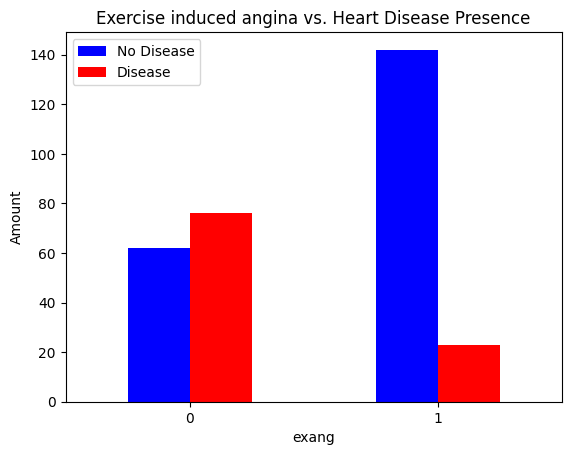

In [27]:
pd.crosstab (df.target , df.exang).plot(kind="bar" , color=["blue" , "red" ])
plt.title("Exercise induced angina vs. Heart Disease Presence")
plt.xlabel("exang")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

If you notice in 'exang', which has values 0 and 1, when 'exang' is 0, the chance of having heart disease (where 'target' is 1) increases, and the opposite is true when 'exang' is 1,
Check the correlation matrix; the value is -0.44, which indicates a negative correlation. 
This observation is correct.


* # Modelling 

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# split our dataset to train set and test set 
x= df.drop("target" , axis=1)
y=df.target

np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

 We have split the data into training and test sets. Now, we will build a machine learning model by training (finding patterns) on the training 
 set and then testing it (using those patterns) on the test set.

 We will use 3 different models for classification:
    
1. Logistic Regressio    n
2. K-Nearest Neighbors (KN    N)
3. Random Forest



In [30]:
models={'Logistic Regressio n' : LogisticRegression(),
       'K-Nearest Neighbors ':KNeighborsClassifier(),
       'Random Forest':RandomForestClassifier(),
}

def evaluate_models (models,x_train,y_train,x_test,y_test):
    """
    Evaluates multiple machine learning models on test data.

    Parameters:
    models (dict): A dictionary where keys are model names (str) and values are the model objects (e.g., LogisticRegression, RandomForestClassifier).
    x_train (array-like): Training data features.
    y_train (array-like): Training data labels.
    x_test (array-like): Test data features.
    y_test (array-like): Test data labels.

    Returns:
    dict: A dictionary where the keys are model names and the values are the accuracy scores on the test data.
    """
    np.random.seed(42)
    result={}
    for model_name , model in models.items():
        model.fit(x_train,y_train)
        result[model_name] = model.score(x_test,y_test)

    return result
        

    
        
    

In [31]:
models.items()

dict_items([('Logistic Regressio n', LogisticRegression()), ('K-Nearest Neighbors ', KNeighborsClassifier()), ('Random Forest', RandomForestClassifier())])

In [32]:
results =evaluate_models(models=models,x_train=x_train, y_train=y_train,x_test=x_test,y_test=y_test)

C:\Users\engah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
results

{'Logistic Regressio n': 0.8852459016393442,
 'K-Nearest Neighbors ': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## compar the models 

<Axes: >

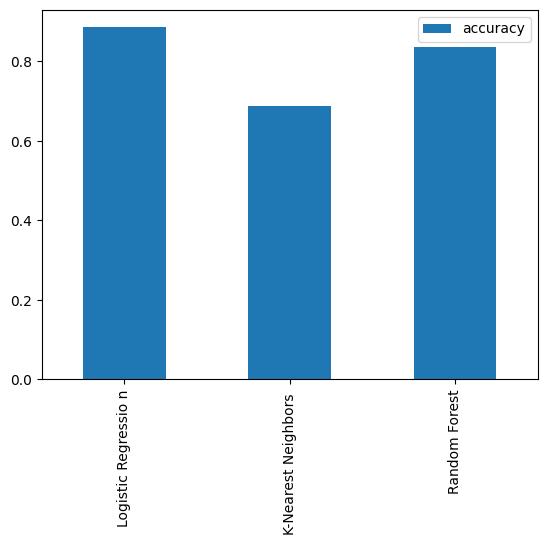

In [34]:
compar_models=pd.DataFrame(results ,index=["accuracy"])
compar_models.T.plot.bar()

## Improving the Baseline Model

Now that we have created a baseline models, we will try to improve the models by experimenting and checking the following aspects:

1. **Hyperparameter Tuning**: Adjusting the parameters of the models to optimize its performance.
2. **Feature Importance**: Analyzing which features are most influential in making predictions.
3. **Confusion Matrix**: A matrix that summarizes the performance of a classification model by showing the true positives, true negatives, false positives, and false negatives.
4. **Cross-Validation**: Using multiple subsets of the data to validate the model, ensuring it generalizes well on unseen data.
5. **Precision**: The proportion of true positive predictions out of all positive predictions (how accurate the positive predictions are).
6. **Recall**: The proportion of actual positive instances that were correctly predicted (how well the model finds all the positive cases).
7. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
8. **Classification Report**: A summary of the main classification metrics such as precision, recall, F1 score, and accuracy.
9. **ROC Curve**: A graphical plot that shows the performance of the classification model at all classification thresholds.
10. **Area Under the Curve (AUC)**: A measure of how well the model distinguishes between classes; the higher, the better.


## 1. improve the KNN model by adjusting hyperparameters (hyperparameter tuning).

In [35]:
train_score=[]
test_score=[]

neighbors=range(1,21)

for i in neighbors :
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test,y_test))

In [36]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

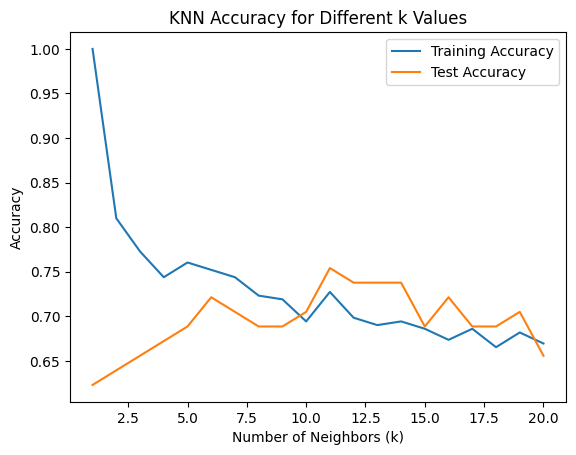

Maximum Test Accuracy: 75.41% with n_neighbors = 11


In [38]:

plt.plot(neighbors, train_score, label="Training Accuracy")
plt.plot(neighbors, test_score, label="Test Accuracy")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.show()

max_test_score = max(test_score)
best_k = neighbors[test_score.index(max_test_score)]
print(f"Maximum Test Accuracy: {max_test_score * 100:.2f}% with n_neighbors = {best_k}")


In [39]:
#onther way to imorove the knn model 
param_grid = {
    'n_neighbors': [3, 5, 7, 9,11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

mo=KNeighborsClassifier()
mo.fit(x_train,y_train)
grid_search = GridSearchCV(mo, param_grid, cv=5, scoring='accuracy' , verbose=2 ,refit=True )
grid_search.fit(x_train, y_train)
print(f"Best parameters for KNN: {grid_search.best_params_}")
print(f"Best accuracy for KNN: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

## Dropping the KNN Model

Since the KNN model did not perform well, we will now focus on improving the other models, specifically **Random Forest** and **Logistic Regression**, 
and we will discontinue the use of the KNN model.


In [40]:
#create ahypermater grid for logisticregression 

log_reg_grid={'C': np.logspace(-4, 4, 20),  # Logarithmic scale for regularization strength
    'solver': ['liblinear'],  # Different solvers
             }

#create ahypermater grid for Randomforecst

rf_grid={'n_estimators' : np.arange(10,1000,50),
         'max_features' :[None , 3 ,5 ,10],
         'min_samples_split' : np.arange(2,20,2),
         'min_samples_leaf' : np.arange(1,20,2)
        }


In [41]:
# setup random hyparamter for logstic regression 
np.random.seed(42)
ra_log_re=RandomizedSearchCV (LogisticRegression(),param_distributions=log_reg_grid , cv=5 ,verbose=True,n_iter=20 )
ra_log_re.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
ra_log_re.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
ra_log_re.score(x_test,y_test)

0.8852459016393442

In [44]:
# setup random hyparamter for RandomForestClassifier 
np.random.seed(42)
ra_rf=RandomizedSearchCV (RandomForestClassifier(),param_distributions=rf_grid , cv=5 ,verbose=True,n_iter=20 , refit=True )
ra_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
ra_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_features': 3}

In [46]:
ra_rf.score(x_test,y_test)

0.8688524590163934

In [47]:
# In this script, we will use GridSearchCV to find the best hyperparameters for the Logistic Regression model.
# The goal is to identify the optimal combination of parameters that results in the best performance for the model.
grid_s_log=GridSearchCV(LogisticRegression() ,param_grid=log_reg_grid ,cv=5 ,verbose=True )

grid_s_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
grid_s_log.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [49]:
grid_s_log.score(x_test , y_test)

0.8852459016393442

## Now, we will create a confusion matrix to evaluate where the model is making mistakes

In [50]:
y_pred=grid_s_log.predict(x_test)

In [51]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [53]:
pd.crosstab(index=y_test, columns=y_pred, 
                                        rownames=['True Labels'], 
                                        colnames=['Predicted Labels'])


Predicted Labels,0,1
True Labels,,
0,25,4
1,3,29


In [54]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


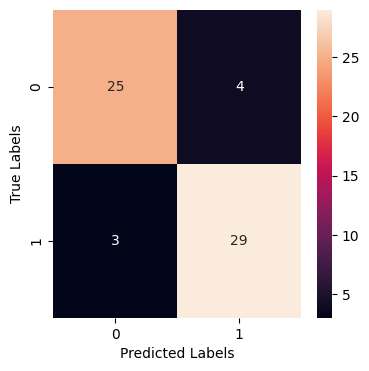

In [55]:
# Function to Plot Confusion Matrix
#This function, `plot_conf_mat`, takes the true labels (`y_test`) and predicted labels (`y_pred`) as inputs and generates a confusion matrix heatmap 
#using Seaborn.

#The confusion matrix shows the counts of correct and incorrect predictions for each class, with true labels on the y-axis and predicted labels on the 
#x-axis. The size of the plot is set to 4x4 inches for better visualization.

def plot_conf_mat(y_test,y_pred):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True )
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')



plot_conf_mat(y_test,y_pred)    
    

# ROC Curve for Logistic Regression Model
In this section, we use the `RocCurveDisplay.from_estimator()` function to plot the Receiver Operating Characteristic (ROC) curve for 
the trained Logistic Regression model (`grid_s_log`).

- **Purpose**: The ROC curve helps evaluate the model's ability to distinguish between classes (e.g., class 0 vs. class 1).
- **Inputs**: 
  - `grid_s_log`: The trained logistic regression model.
  - `X_test`: The test set features.
  - `y_test`: The true labels from the test set.
- **Output**: A plot of the ROC curve, showing the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels. 
The curve helps assess how well the model can separate the classes.

The Area Under the Curve (AUC) is a useful metric that summarizes the model's overall performance: a higher AUC indicates better model performance.


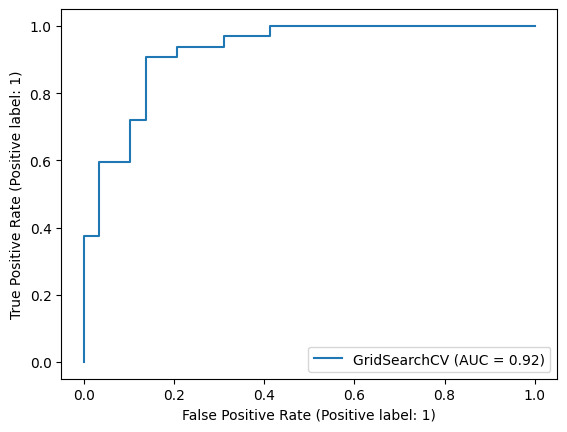

In [56]:
RocCurveDisplay.from_estimator(grid_s_log,x_test,y_test);

## Generating a Classification Report for a Single Test Set


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Generating a Classification Report using Cross-Validation (Without Shuffling Data)


In [58]:
#lets setup the logistic model again with the best hyparmeter 
grid_s_log.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
clf=LogisticRegression(C=0.23357214690901212 , solver="liblinear")

np.random.seed(42)
#cross val accuarcy 
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy") 
cv_acc_m=np.mean(cv_acc)
cv_acc_m

0.8479781420765027

In [60]:
#cross val precision
np.random.seed(42)
cv_pre=cross_val_score(clf,x,y,cv=5,scoring="precision") 
cv_pre_m=np.mean(cv_pre)
cv_pre_m

0.8215873015873015

In [61]:
#cross val recall
np.random.seed(42)
cv_rec=cross_val_score(clf,x,y,cv=5,scoring="recall") 
cv_rec_m=np.mean(cv_rec)
cv_rec_m

0.9272727272727274

In [62]:
#cross val F1
np.random.seed(42)
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1") 
cv_f1_m=np.mean(cv_f1)
cv_f1_m

0.8705403543192143

## Generating a Classification Report using Cross-Validation (With Shuffling Data)


In [63]:
from sklearn.model_selection import StratifiedKFold
clf2 = LogisticRegression(C=0.23357214690901212, solver="liblinear")

# Set the random seed for reproducibility
np.random.seed(42)

# Create a StratifiedKFold object with shuffling enabled
cv1 = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation with shuffling
cv_acc2 = cross_val_score(clf2, x, y, cv=cv1, scoring="accuracy")

# Output the mean accuracy
sc=np.mean(cv_acc2)
sc

0.8449180327868853

In [64]:
np.random.seed(42)



# Perform cross-validation with shuffling
cv_pre2 = cross_val_score(clf2, x, y, cv=cv1, scoring="precision")

# Output the mean accuracy
ps=np.mean(cv_pre2)
ps

0.8160360360360361

In [65]:
np.random.seed(42)
cv_rec1=cross_val_score(clf2,x,y,cv=cv1,scoring="recall") 
erm=np.mean(cv_rec1)
erm

0.9272727272727274

In [66]:
#cross val F1
np.random.seed(42)
cv_f1s=cross_val_score(clf2,x,y,cv=cv1,scoring="f1") 
f1m=np.mean(cv_f1s)
f1m

0.8673501400560225

In [67]:
vul=pd.DataFrame({"accuracy": [cv_acc_m , sc] ,
             "precision":[cv_pre_m,ps],
              "recall":[cv_rec_m,erm],
              "f1":[cv_f1_m,f1m]
              
             })

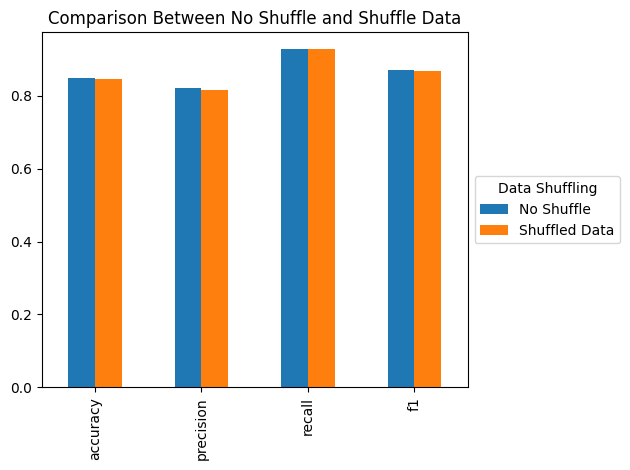

In [68]:
vul.T.plot(kind="bar")
plt.title('Comparison Between No Shuffle and Shuffle Data')

# Move the legend outside the plot
plt.legend(title="Data Shuffling", labels=["No Shuffle", "Shuffled Data"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [69]:
clf = LogisticRegression(C=0.23357214690901212 , solver="liblinear")
clf.fit(x_train , y_train )

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [70]:
most_feature=clf.coef_[0]

In [71]:
most_feature

array([ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
        0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
        0.4709512 , -0.6516535 , -0.69984202])

In [93]:
feat_dic=dict(zip(df.columns,most_feature))
feat_dic

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [96]:
most_feature_data=pd.DataFrame(feat_dic , index=[0])
most_feature_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.575909,0.470951,-0.651654,-0.699842


<Axes: title={'center': 'Feature Importance'}>

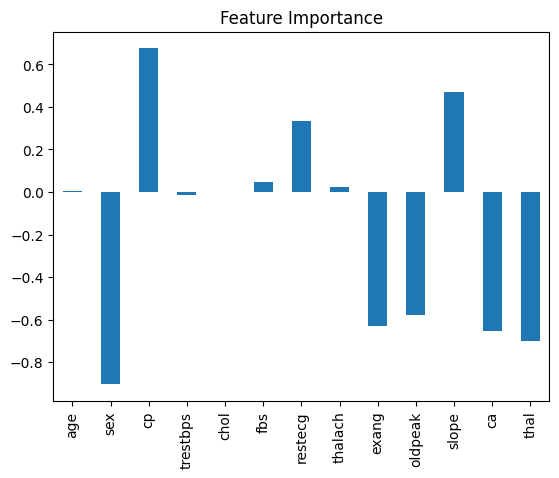

In [102]:
most_feature_data.T.plot.bar(title="Feature Importance", legend=False)